In [1]:
import medlatin
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medlatin1_path = '../MedLatin/Corpora/MedLatinEpi'

medlatin1_texts, medlatin1_authors, medlatin_titles = medlatin.load_medlatin(medlatin1_path)

In [3]:
with open('csvfiles/author_changes_names.txt', 'r', encoding='utf-8') as f:
    author_names = [name.strip() for name in f.readlines()]

with open('csvfiles/author_changes_idx.txt', 'r', encoding='utf-8') as f:
    author_idx = [int(idx.strip()) for idx in f.readlines()]

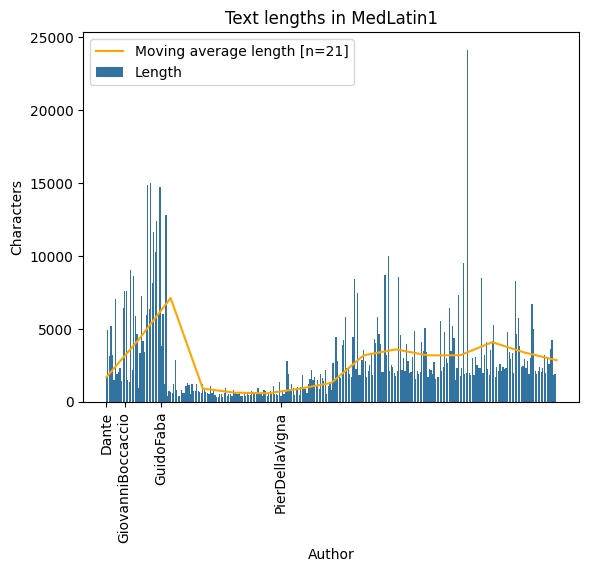

In [5]:
medlatin1_lens = [len(text) for text in medlatin1_texts]
medlatin1_lens_av = [medlatin1_lens[0]]
previous_i = 0
window_size = 21
for i in np.arange(window_size, len(medlatin1_lens)+1, window_size):
    window = medlatin1_lens[previous_i:i]
    medlatin1_lens_av.append(np.mean(window))
    previous_i = i

fig, ax = plt.subplots()

sns.barplot(medlatin1_lens, ax=ax, label='Length')
sns.lineplot(y=medlatin1_lens_av, x=np.arange(0, len(medlatin1_lens)+1, window_size), ax=ax, color='orange', label=f'Moving average length [n={window_size}]')
ax.set_title('Text lengths in MedLatin1')
ax.set_ylabel('Characters')
ax.set_xlabel('Author')
ax.set_xticks(author_idx)
ax.set_xticklabels(author_names, rotation=90)
ax.legend();

In [9]:
shortest = np.argmin(medlatin1_lens)
longest = np.argmax(medlatin1_lens)

In [20]:
print(f'The shortest text is no. {shortest} (Guido Faba) at {medlatin1_lens[shortest]} characters')
print(f'The longest text is no. {longest} (Pier Della Vigna) at {medlatin1_lens[longest]} characters')
print(f'The mean character length is {np.mean(medlatin1_lens):.2f}, but the median is {np.median(medlatin1_lens):.2f}')
print(f'The standard deviation of lengths is {np.std(medlatin1_lens):.2f}')

The shortest text is no. 73 (Guido Faba) at 334 characters
The longest text is no. 236 (Pier Della Vigna) at 24160 characters
The mean character length is 2793.54, but the median is 2004.50
The standard deviation of lengths is 2876.04
